In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification

In [2]:
#KNN
df = pd.read_csv('D:\\CS 325 Data Mining\\Datasets\\archive\\Heart.csv')
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [7]:
X= df.iloc[:,1:14]
Y= df.iloc[:,-1]
df['ChestPain'].replace(['typical', 'nontypical', 'nonanginal', 'asymptomatic'], [1,2,3,4], inplace=True)
df['Thal'].replace(['normal', 'fixed', 'reversable'], [1,2,3], inplace=True)
df['AHD'].replace(['No', 'Yes'], [0,1], inplace=True)
df.replace('NA', np.nan, inplace = True)
df.replace(' ', np.nan, inplace = True)
df.dropna( inplace = True, how = 'any')
df = df[df.Thal != '.']
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,2.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,1.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,3.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,1.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1.0,0


In [8]:
X= df[['Ca', 'AHD', 'MaxHR']]
Y= df[['AHD']] 

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.4,random_state=100)

In [10]:
#KNN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
X = StandardScaler().fit_transform(X)

In [11]:
# Split the data into features (X) and target (y)
X = df.drop('AHD', axis=1)
y = df['AHD']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [13]:
y_pred = knn.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [14]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8666666666666667


In [15]:
k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Text(0, 0.5, 'Accuracy Score')

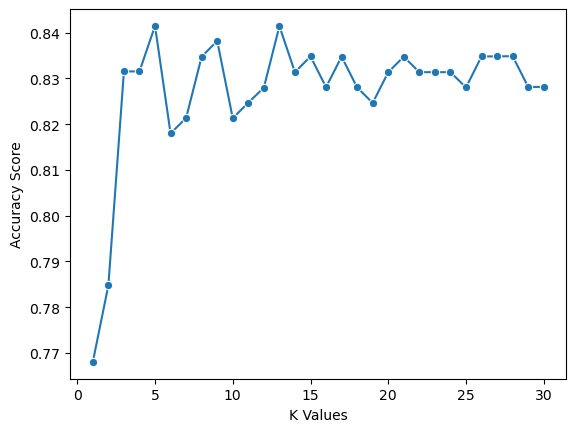

In [16]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [17]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [19]:
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8666666666666667
Precision: 0.96
Recall: 0.7741935483870968


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [21]:
import csv
import numpy as np
from scipy.spatial.distance import euclidean, cosine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

def euclidean_distance(x1, x2):
    return euclidean(x1, x2)

def cosine_similarity(x1, x2):
    return 1 - cosine(x1, x2)

class KNN:
    def __init__(self, k=3, distance_metric=euclidean_distance):
        self.k = k
        self.distance_metric = distance_metric

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = []
        for x in X:
            distances = [self.distance_metric(x, x_train) for x_train in self.X_train]
            k_indices = np.argsort(distances)[:self.k]
            k_labels = [self.y_train[i] for i in k_indices]
            y_pred.append(max(set(k_labels), key=k_labels.count))
        return y_pred

# Load the CSV dataset
def load_csv(filename):
    dataset = []
    with open(filename, 'r') as file:
        csv_reader = csv.reader(file)
        # Skip the header row
        next(csv_reader)
        for row in csv_reader:
            dataset.append(row)
    return np.array(dataset)

# Split the dataset into features and labels
def split_dataset(dataset):
    X = dataset[:, :-1]
    y = dataset[:, -1]
    return X, y

# Encode categorical variables using label encoding
def encode_categorical_features(X):
    label_encoder = LabelEncoder()
    for i in range(X.shape[1]):
        if isinstance(X[0, i], str):
            X[:, i] = label_encoder.fit_transform(X[:, i])
    return X.astype(float)

# Load and preprocess the dataset
dataset = load_csv('D:\\CS 325 Data Mining\\Datasets\\archive\\Heart.csv')
X, y = split_dataset(dataset)

# Encode categorical features
X = encode_categorical_features(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN classifier using Euclidean distance metric
knn_euclidean = KNN(k=3, distance_metric=euclidean_distance)
knn_euclidean.fit(X_train, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test)

# Create a KNN classifier using Cosine similarity metric
knn_cosine = KNN(k=3, distance_metric=cosine_similarity)
knn_cosine.fit(X_train, y_train)
y_pred_cosine = knn_cosine.predict(X_test)

# Print the accuracy of the classifiers
accuracy_euclidean = np.sum(y_pred_euclidean == y_test) / len(y_test)
accuracy_cosine = np.sum(y_pred_cosine == y_test) / len(y_test)
print("Accuracy (Euclidean):", accuracy_euclidean)
print("Accuracy (Cosine):", accuracy_cosine)


Accuracy (Euclidean): 0.7540983606557377
Accuracy (Cosine): 0.3114754098360656
